<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/market-analytics-project/Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle

In [15]:
insta=pd.read_csv('Instagram-Data.csv')

In [16]:
insta.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


In [17]:
insta.shape

(1000, 11)

In [18]:
insta.describe()

,Rank,Followers,Authentic engagement,Engagement avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,2.483610e+07,6.491228e+05,8.653886e+05
std,288.819436,3.872143e+07,1.098804e+06,1.267515e+06
min,1.000000,2.800000e+06,0.000000e+00,5.200000e+04
25%,250.750000,9.000000e+06,2.091000e+05,3.086000e+05
50%,500.500000,1.440000e+07,3.637000e+05,5.239000e+05
75%,750.250000,2.565000e+07,6.832500e+05,9.508000e+05
max,1000.000000,4.696000e+08,1.340000e+07,1.340000e+07


In [19]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Account               1000 non-null   object
 3   Title                 983 non-null    object
 4   Link                  1000 non-null   object
 5   Category              909 non-null    object
 6   Followers             1000 non-null   int64 
 7   Audience Country      993 non-null    object
 8   Authentic engagement  1000 non-null   int64 
 9   Engagement avg        1000 non-null   int64 
 10  Scraped               1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [20]:
df=insta.copy()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Argentina'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'South Korea'),
  Text(9, 0, 'Egypt'),
  Text(10, 0, 'Turkey'),
  Text(11, 0, 'Spain'),
  Text(12, 0, 'Italy'),
  Text(13, 0, 'China'),
  Text(14, 0, 'Colombia'),
  Text(15, 0, 'Iran'),
  Text(16, 0, 'United Kingdom'),
  Text(17, 0, 'Poland'),
  Text(18, 0, 'Nigeria'),
  Text(19, 0, 'Thailand'),
  Text(20, 0, 'Philippines'),
  Text(21, 0, 'Saudi Arabia'),
  Text(22, 0, 'Morocco'),
  Text(23, 0, 'United Arab Emirates'),
  Text(24, 0, 'Iraq'),
  Text(25, 0, 'Germany'),
  Text(26, 0, 'Algeria'),
  Text(27, 0, 'Syria'),
  Text(28, 0, 'Japan'),
  Text(29, 0, 'Chile'),
  Text(30, 0, 'Kazakhstan')])

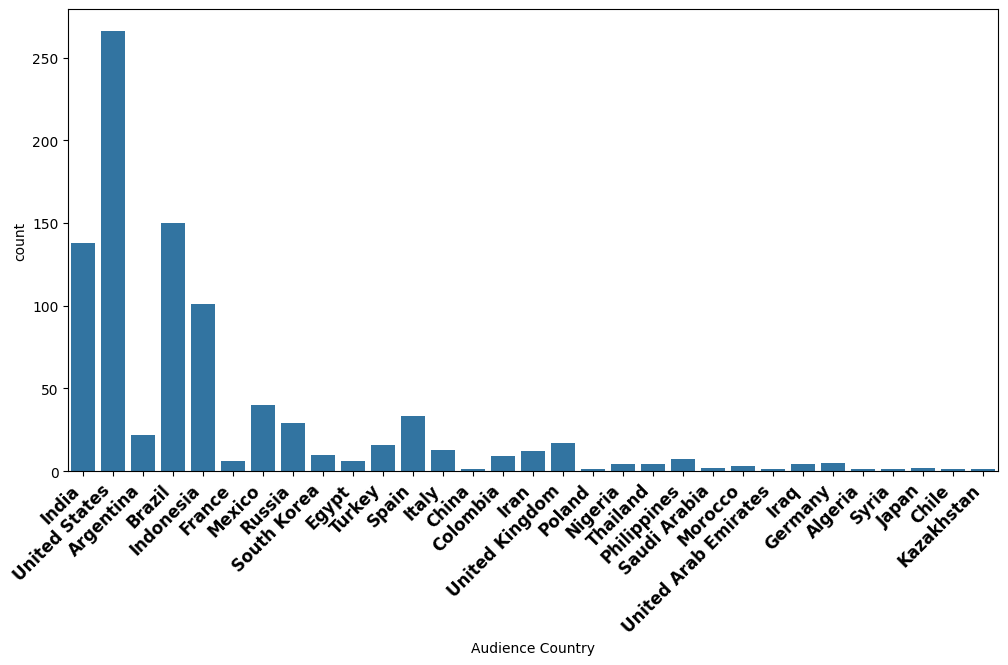

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Audience Country')
plt.xticks(rotation=45,fontsize=12, fontweight='bold', ha='right')

In [21]:
df=df.drop('Title',axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Account               1000 non-null   object
 3   Link                  1000 non-null   object
 4   Category              909 non-null    object
 5   Followers             1000 non-null   int64 
 6   Audience Country      993 non-null    object
 7   Authentic engagement  1000 non-null   int64 
 8   Engagement avg        1000 non-null   int64 
 9   Scraped               1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [23]:
df=df.dropna()

In [24]:
df=df.drop('Country',axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  906 non-null    int64 
 1   Account               906 non-null    object
 2   Link                  906 non-null    object
 3   Category              906 non-null    object
 4   Followers             906 non-null    int64 
 5   Audience Country      906 non-null    object
 6   Authentic engagement  906 non-null    int64 
 7   Engagement avg        906 non-null    int64 
 8   Scraped               906 non-null    object
dtypes: int64(4), object(5)
memory usage: 70.8+ KB


<ipython-input-26-2e203914ec30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_users.index,y=top_10_users.values,palette='viridis')


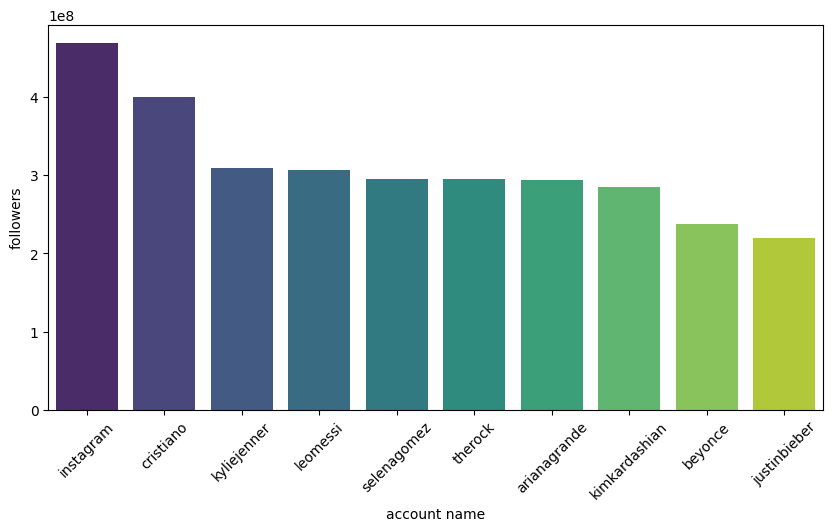

In [26]:
top_10_users=df.groupby('Account')['Followers'].sum().sort_values(ascending=False).head(10)
top_10_users
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_users.index,y=top_10_users.values,palette='viridis')
plt.xlabel('account name')
plt.ylabel('followers')
plt.xticks(rotation=45)
plt.show()



In [29]:
top_10_category=df.groupby(['Account','Category'])['Followers'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_category

,Account,Category,Followers
0,instagram,Photography,469600000
1,cristiano,Sports with a ball,400100000
2,kyliejenner,Fashion|Modeling|Beauty,308800000
3,leomessi,Sports with a ball|Family,306300000
4,selenagomez,Music|Lifestyle,295800000
5,therock,Cinema|Actors/actresses|Fitness|Gym,295800000
6,arianagrande,Music,294100000
7,kimkardashian,Fashion|Beauty,284900000
8,beyonce,Music|Fashion,237200000
9,justinbieber,Music,219800000


In [30]:
top_10_audiance=df.groupby(['Account','Category','Audience Country'])['Followers'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_audiance

,Account,Category,Audience Country,Followers
0,instagram,Photography,India,469600000
1,cristiano,Sports with a ball,India,400100000
2,kyliejenner,Fashion|Modeling|Beauty,United States,308800000
3,leomessi,Sports with a ball|Family,Argentina,306300000
4,selenagomez,Music|Lifestyle,United States,295800000
5,therock,Cinema|Actors/actresses|Fitness|Gym,India,295800000
6,arianagrande,Music,United States,294100000
7,kimkardashian,Fashion|Beauty,United States,284900000
8,beyonce,Music|Fashion,United States,237200000
9,justinbieber,Music,India,219800000


In [31]:
df_US=df[df['Audience Country']=='United States']

<ipython-input-40-2d74e754a38d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_category_us['Category'],y=top_10_category_us['Followers'],palette='coolwarm')


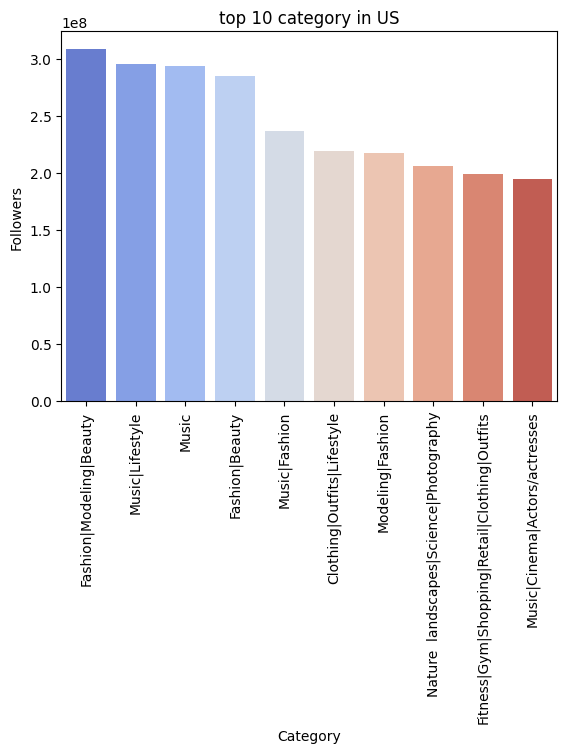

In [40]:
top_10_category_us=df_US.groupby(['Account','Category'])['Followers'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_category_us
sns.barplot(x=top_10_category_us['Category'],y=top_10_category_us['Followers'],palette='coolwarm')
plt.xticks(rotation=90)
plt.title('top 10 category in US')
plt.show()

In [36]:
bottom_10_category_us=df_US.groupby(['Account','Category'])['Followers'].sum().sort_values(ascending=True).head(10).reset_index()
bottom_10_category_us


,Account,Category,Followers
0,wilbursoot,Music,3200000
1,kaliuchis,Music,3700000
2,rice,Shows|Humor|Fun|Happiness,3700000
3,jackharlow,Lifestyle|Music,4600000
4,naileadevora,Shows,4800000
5,veradijkmans,Adult content,4900000
6,thegirljt,Music,5000000
7,cole.labrant,Lifestyle|Fashion,5000000
8,yungmiami305,Lifestyle,5100000
9,sssniperwolf,Music,5300000
